In [16]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
api_key = 'XT9O0W7AVA8N5B36'
ts = TimeSeries(key=api_key, output_format='pandas')
stock_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-01-01'
stock_data, metadata = ts.get_daily(symbol=stock_symbol, outputsize='full')
stock_data = stock_data[(stock_data.index >= start_date) & (stock_data.index <= end_date)]

# Data Cleaning

In [17]:
# Check the first few rows of the cleaned data
print(stock_data.head())

            1. open   2. high  3. low  4. close   5. volume
date                                                       
2022-12-30   128.41  129.9500  127.43    129.93  77034209.0
2022-12-29   127.99  130.4814  127.73    129.61  75703710.0
2022-12-28   129.67  131.0275  125.87    126.04  85438391.0
2022-12-27   131.38  131.4100  128.72    130.03  69007830.0
2022-12-23   130.92  132.4150  129.64    131.86  63814893.0


In [18]:
# Handle duplicate values (if any)
stock_data = stock_data[~stock_data.index.duplicated(keep='first')]
stock_data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-12-30,128.41,129.9500,127.43,129.93,77034209.0
2022-12-29,127.99,130.4814,127.73,129.61,75703710.0
2022-12-28,129.67,131.0275,125.87,126.04,85438391.0
2022-12-27,131.38,131.4100,128.72,130.03,69007830.0
2022-12-23,130.92,132.4150,129.64,131.86,63814893.0
...,...,...,...,...,...
2020-01-08,297.16,304.4400,297.16,303.19,33090946.0
2020-01-07,299.84,300.9000,297.48,298.39,27877655.0
2020-01-06,293.79,299.9600,292.75,299.80,29644644.0


In [19]:
stock_data.fillna(0, inplace=True)
stock_data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-12-30,128.41,129.9500,127.43,129.93,77034209.0
2022-12-29,127.99,130.4814,127.73,129.61,75703710.0
2022-12-28,129.67,131.0275,125.87,126.04,85438391.0
2022-12-27,131.38,131.4100,128.72,130.03,69007830.0
2022-12-23,130.92,132.4150,129.64,131.86,63814893.0
...,...,...,...,...,...
2020-01-08,297.16,304.4400,297.16,303.19,33090946.0
2020-01-07,299.84,300.9000,297.48,298.39,27877655.0
2020-01-06,293.79,299.9600,292.75,299.80,29644644.0


In [20]:
column_names = stock_data.columns
print(column_names)

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')


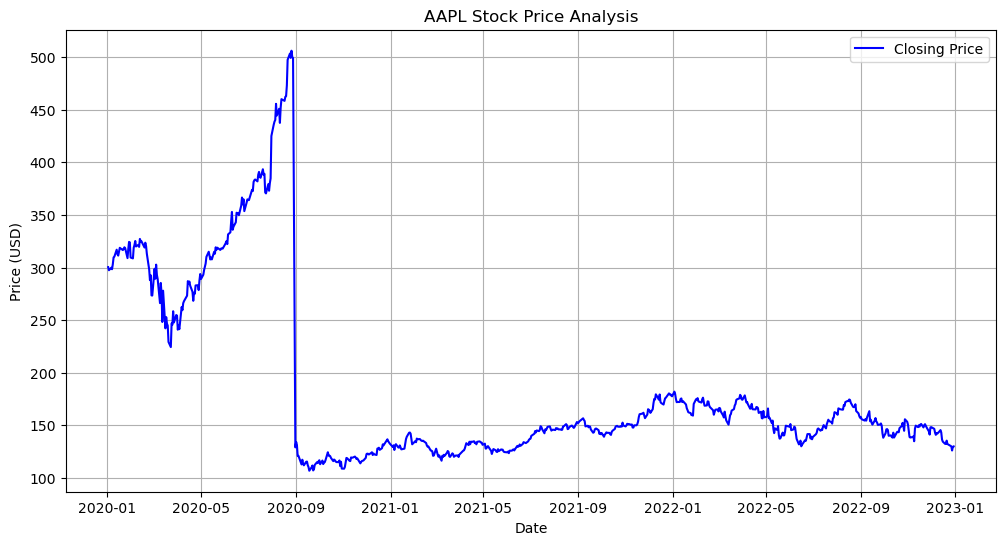

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['4. close'], label='Closing Price', color='blue')
plt.title(f'{stock_symbol} Stock Price Analysis')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

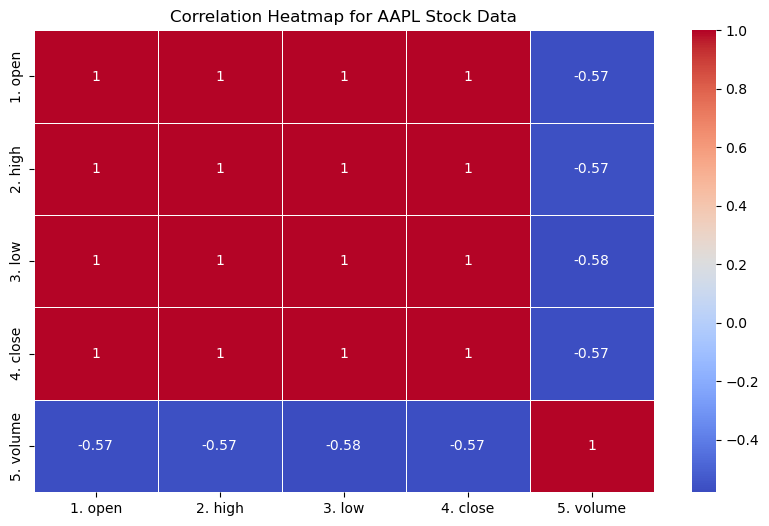

In [22]:
import seaborn as sns
correlation_matrix = stock_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'Correlation Heatmap for {stock_symbol} Stock Data')
plt.show()

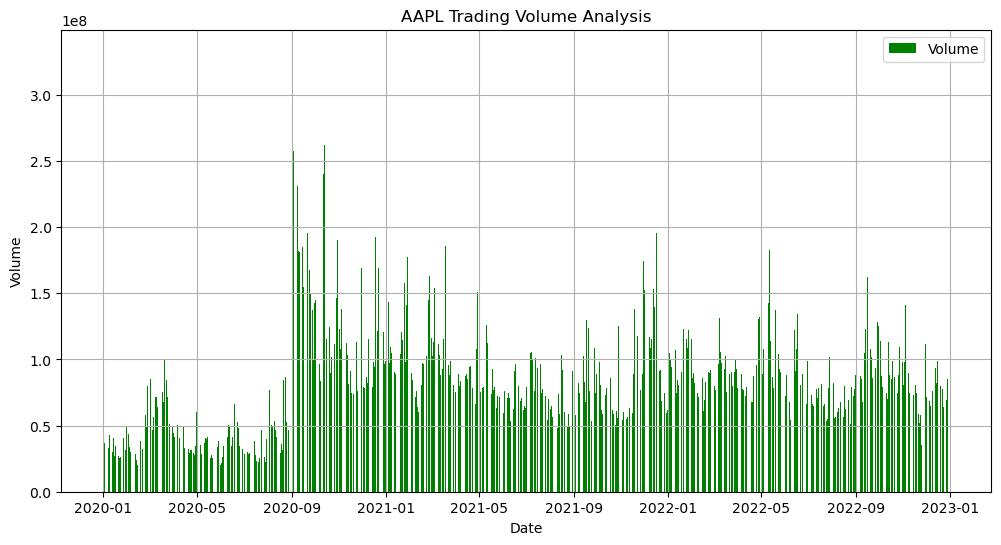

In [23]:
# Bar Chart for Trading Volume
plt.figure(figsize=(12, 6))
plt.bar(stock_data.index, stock_data['5. volume'], label='Volume', color='green')
plt.title(f'{stock_symbol} Trading Volume Analysis')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

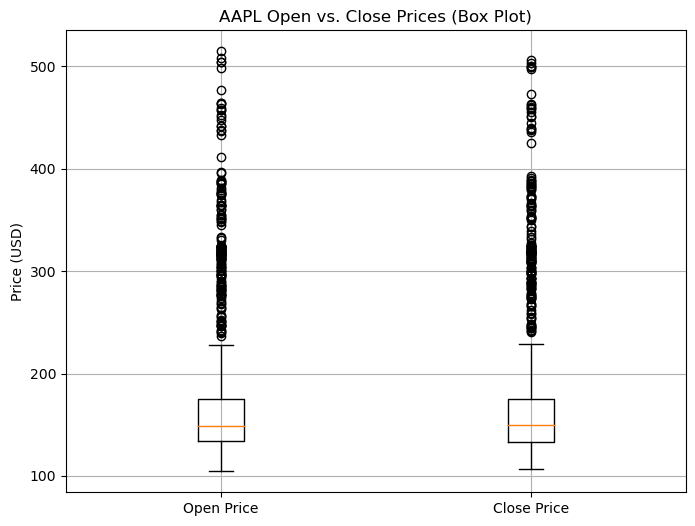

In [24]:
plt.figure(figsize=(8, 6))
data_to_plot = [stock_data['1. open'], stock_data['4. close']]
plt.boxplot(data_to_plot, labels=['Open Price', 'Close Price'])
plt.title(f'{stock_symbol} Open vs. Close Prices (Box Plot)')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

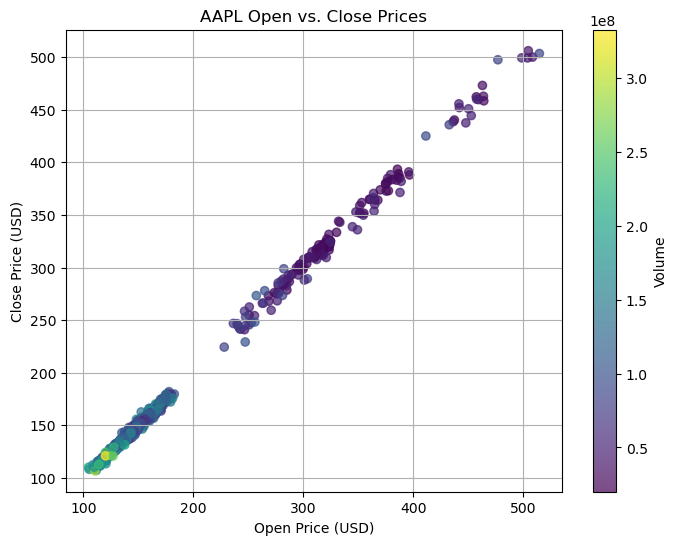

In [25]:
# Scatter Plot of Open and Close Prices using the specified column names
plt.figure(figsize=(8, 6))
plt.scatter(stock_data['1. open'], stock_data['4. close'], c=stock_data['5. volume'], cmap='viridis', alpha=0.7)
plt.title(f'{stock_symbol} Open vs. Close Prices')
plt.xlabel('Open Price (USD)')
plt.ylabel('Close Price (USD)')
plt.colorbar(label='Volume')
plt.grid(True)
plt.show()


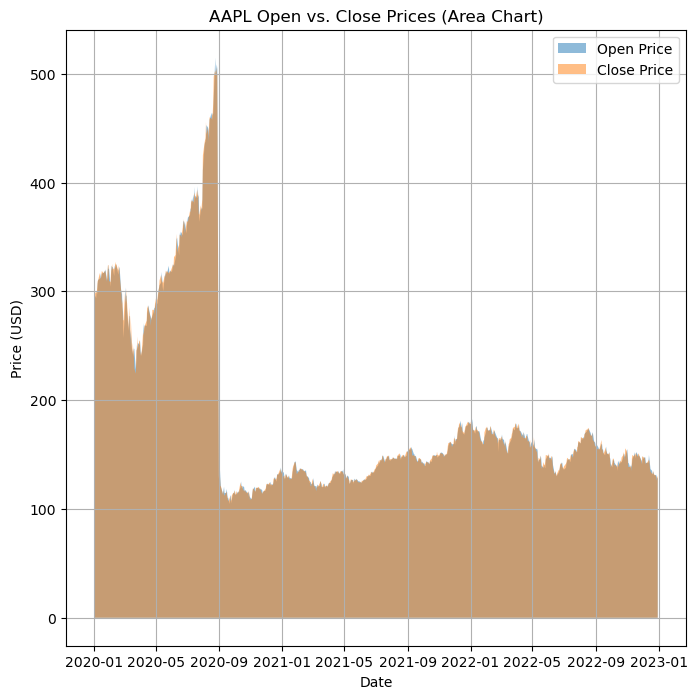

In [26]:
plt.figure(figsize=(8,8))
plt.fill_between(stock_data.index, stock_data['1. open'], alpha=0.5)
plt.fill_between(stock_data.index, stock_data['4. close'], alpha=0.5)
plt.title(f'{stock_symbol} Open vs. Close Prices (Area Chart)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(['Open Price', 'Close Price'])
plt.grid(True)
plt.show()
